In [6]:
from IPython.core.display import display, HTML, Javascript, clear_output, Image
display(HTML("<style>.container { width:85% !important; } </style>"))

[<img align="left" src="http://biopython.org/DIST/docs/tutorial/images/biopython_logo.svg" width="500" height="500">](https://biopython.org/)

### <font color=#333333>Biopython es un conjunto de herramientas para análisis biológico escritas en python por un equipo internacional de desarrolladores.</font>
### <font color=#333333>Esta aplicación refleja un esfuerzo colaborativo para desarrollar bibliotecas de python y aplicaciones para dirigir las necesidades actuales y a futuro de trabajos bioinformáticos.</font>
</br>

## Contenido

* Sequence objects  
* Sequence annotation objects  
* Sequence Input/Output  
* Multiple Sequence Alignment objects  
* BLAST  
* BLAST and other sequence search tools  
* Accessing NCBI’s Entrez databases  
* Swiss-Prot and ExPASy  
* Going 3D: The PDB module  
* Bio.PopGen: Population genetics  
* Phylogenetics with Bio.Phylo  
* Sequence motif analysis using Bio.motifs  
* Cluster analysis  
* Supervised learning methods  
* Graphics including GenomeDiagram  
* KEGG  
* Bio.phenotype: analyse phenotypic data  

<b style="font-size:2vw"><font color = red>1. Trabajando sobre secuencias</font></b>

#### importamos la función `Seq` desde el módulo Bio.Seq
La función `Seq` convierte en objeto Seq, el cual es compatible con más funciones implementadas en Biopython

In [7]:
from Bio.Seq import Seq

#### guardamos una secuencia de nucleótidos en la variable `mi_sec`

In [8]:
mi_sec = Seq("TTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAATCTTACAACCAGA")

In [9]:
print(mi_sec)

TTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAATCTTACAACCAGA


#### longitud de la secuencia

In [10]:
len(mi_sec)

60

#### iteración sobre las bases de la secuencia

In [11]:
for indice, base in enumerate(mi_sec):
    print(indice, base)

0 T
1 T
2 T
3 G
4 T
5 T
6 T
7 T
8 T
9 C
10 T
11 T
12 G
13 T
14 T
15 T
16 T
17 A
18 T
19 T
20 G
21 C
22 C
23 A
24 C
25 T
26 A
27 G
28 T
29 C
30 T
31 C
32 T
33 A
34 G
35 T
36 C
37 A
38 G
39 T
40 G
41 T
42 G
43 T
44 T
45 A
46 A
47 T
48 C
49 T
50 T
51 A
52 C
53 A
54 A
55 C
56 C
57 A
58 G
59 A


#### determinar el % de GC

In [12]:
float(mi_sec.count("G") + mi_sec.count("C")) / len(mi_sec) * 100

33.33333333333333

####  importamos la función `GC` para determinar % de GC

In [13]:
from Bio.SeqUtils import GC

In [14]:
GC(mi_sec)

33.333333333333336

#### cortar una secuencia
[Revizar como es el indizado en python.](https://raw.githubusercontent.com/eduardo1011/curso_08_2021/main/indizado2_python.jpg)

In [18]:
# !cuidado con los índice que maneja python! 
# en realidad está obteniendo desde la 7 a la 14
print(mi_sec[6:14])

TTTCTTGT


In [19]:
# en realidad está obteniendo desde la 25 a la 34
print(mi_sec[24:34]) 

CTAGTCTCTA


In [20]:
# empieza de la posición 0, y muestra las bases que se encuentran cada 2 posiciones
print(mi_sec[0::2])

TTTTTTGTTTGCCATTTGCGGGTACTCACG


#### convierte la secuencia en una cadena de caracteres

In [24]:
# la función str convierte a la secuencia en un objeto de tipo "str" (string)
str(mi_sec)

'TTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAATCTTACAACCAGA'

#### convierte el objeto en secuencia fasta

In [25]:
# guarda la secuencia en la variable sec_fasta
sec_fasta = '>nombre de secuencia\n' + str(mi_sec)

In [26]:
# imprimir la secuencia
print(sec_fasta)

>nombre de secuencia
TTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAATCTTACAACCAGA


#### concatena o agrega secuencias

In [27]:
# crea una lista con objetos "Seq" (es decir, fragmentos de secuencias)
list_secs = [Seq("tttgtttttc"), Seq("ttgttttattgcca"), Seq("CTAGTCTCTAGTCAG"), Seq("TGTGTTAAT")]

# crea una variable vacía donde se guardará cada fragmento
concatenada = Seq("")

# itera la lista de secuencias para unir todos los fragmentos y generar una sola secuencia final
for s in list_secs:
    concatenada += s

In [28]:
print(concatenada)

tttgtttttcttgttttattgccaCTAGTCTCTAGTCAGTGTGTTAAT


####  funciones `.upper()` y `.lower()` para transformar minúsculas y mayúsculas

In [29]:
# transforma en mayúsculas
concatenada.upper()

Seq('TTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAAT')

In [30]:
# transforma en minúsculas
concatenada.lower()

Seq('tttgtttttcttgttttattgccactagtctctagtcagtgtgttaat')

#### las funciones `.upper()` y `.lower()` son útiles para buscar coincidencias que no distinguen entre minúsculas y mayúsculas

In [31]:
# no hay coincidencia porque tiene minúsculas y mayúsculas (ctagTCTC)
"TGCCACTAGTCT" in concatenada

False

In [32]:
# ahora que todas son mayúsculas (CTAGTCTC) si hay coincidencia
"TGCCACTAGTCT" in concatenada.upper()

True

#### Obtener el reverso complementario, funciones `.complement()` y `.reverse_complement()`

In [33]:
print(mi_sec)

TTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAATCTTACAACCAGA


In [34]:
# imprime la cadena complementaria
print(mi_sec.complement())

AAACAAAAAGAACAAAATAACGGTGATCAGAGATCAGTCACACAATTAGAATGTTGGTCT


In [35]:
# imprime la cadena reversa complementaria
print(mi_sec.reverse_complement())

TCTGGTTGTAAGATTAACACACTGACTAGAGACTAGTGGCAATAAAACAAGAAAAACAAA


<hr style="height:5px;border-width:0;color:blue;background-color:blue">

<img align="left" src="https://raw.githubusercontent.com/eduardo1011/curso_08_2021/main/exercise_blue.png" width="80" height="80">

<font color=#0000ff> <b>Ejercicio:</b> *determina la cadena reversa complementaria de la siguiente secuencia usando funciones de Biopython.*  </font><br>
<font> `ACTCAATTACCCCCTGCATACACTAATTCTTTCACACGTGGTGTT` </font>


In [36]:
print('Respuesta:', )

Respuesta:


<hr style="height:5px;border-width:0;color:blue;background-color:blue">

* ### Transcripción
<img align="left" src="https://raw.githubusercontent.com/eduardo1011/curso_08_2021/main/transcripcion2.png" width="600" height="600">

 > #### funciones de biopython: `.transcribe()` y `.back_transcribe()`

In [49]:
# cadena 
print("5'-", mi_sec, "-3'")
print('    '+'|' * len(mi_sec))
print("3'-", mi_sec.complement(), "-5'")

5'- TTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAATCTTACAACCAGA -3'
    ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
3'- AAACAAAAAGAACAAAATAACGGTGATCAGAGATCAGTCACACAATTAGAATGTTGGTCT -5'


In [50]:
mensajero = mi_sec.transcribe()

In [51]:
# Conversión de la cadena codificante en ARNm, cambio de T por U
print(mensajero)

UUUGUUUUUCUUGUUUUAUUGCCACUAGUCUCUAGUCAGUGUGUUAAUCUUACAACCAGA


In [52]:
# conversión del ARNm a cadena codificante 
print(mensajero.back_transcribe())

TTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAATCTTACAACCAGA


* ### Traducción
<img align="left" src="https://raw.githubusercontent.com/eduardo1011/curso_08_2021/main/traduccion.png" width="600" height="600">

> #### funciones `.translate()` (biopython usa el código genético estándar)

In [53]:
print(mensajero)

UUUGUUUUUCUUGUUUUAUUGCCACUAGUCUCUAGUCAGUGUGUUAAUCUUACAACCAGA


In [54]:
# traducción del ARNm
proteina = mensajero.translate()

In [55]:
# ahora se muestran los residuos de aminoácidos de la proteína
print(proteina)

FVFLVLLPLVSSQCVNLTTR


In [56]:
# otra forma de hacer la traducción es usando cadena codificante
print(mi_sec.translate())

FVFLVLLPLVSSQCVNLTTR


In [57]:
# longitud final de la secuencia traducida
print(len(mi_sec.translate()))

20


**Existen varios códigos genéticos disponibles, por lo tanto, para hacer la traducción es necesario conocerlos.**  
https://www.ncbi.nlm.nih.gov/Taxonomy/Utils/wprintgc.cgi

In [59]:
# de acuerdo al código mitocondrial de vertebrados la R ("AGG") del código estándar corresponde a un codón de paro (*)
print('https://www.ncbi.nlm.nih.gov/Taxonomy/Utils/wprintgc.cgi#SG2', '\n')
print(mi_sec.translate(table="Vertebrate Mitochondrial"))

https://www.ncbi.nlm.nih.gov/Taxonomy/Utils/wprintgc.cgi#SG2 

FVFLVLLPLVSSQCVNLTT*


In [60]:
# ejemplo con una secuencia de bacteria
gen_bacteria = Seq("GTGAAAAAGATGCAATCTATCGTACTCGCACTTTCCCTGGTTCTGGTCGCTCCCATGGCA"
                   "GCACAGGCTGCGGAAATTACGTTAGTCCCGTCAGTAAAATTACAGATAGGCGATCGTGAT"
                   "AATCGTGGCTATTACTGGGATGGAGGTCACTGGCGCGACCACGGCTGGTGGAAACAACAT"
                   "TATGAATGGCGAGGCAATCGCTGGCACCTACACGGACCGCCGCCACCGCCGCGCCACCAT"
                   "AAGAAAGCTCCTCATGATCATCACGGCGGTCATGGTCCAGGCAAACATCACCGCTAA")

In [61]:
# se elige el código genético para bacterias
# en bacterias GTG puede ser un codón de inicio, mientras que normalmente codifica para valina

print(gen_bacteria.translate(table="Bacterial"))

VKKMQSIVLALSLVLVAPMAAQAAEITLVPSVKLQIGDRDNRGYYWDGGHWRDHGWWKQHYEWRGNRWHLHGPPPPPRHHKKAPHDHHGGHGPGKHHR*


In [62]:
# la función `to_stop` remueve el codón de paro (*)
print(gen_bacteria.translate(table="Bacterial", to_stop=True))

VKKMQSIVLALSLVLVAPMAAQAAEITLVPSVKLQIGDRDNRGYYWDGGHWRDHGWWKQHYEWRGNRWHLHGPPPPPRHHKKAPHDHHGGHGPGKHHR


In [64]:
# en este caso el codón de inicio (GTG = V) se traduce como metionina
gen_bacteria.translate(table="Bacterial", cds=True)

Seq('MKKMQSIVLALSLVLVAPMAAQAAEITLVPSVKLQIGDRDNRGYYWDGGHWRDH...HHR', ExtendedIUPACProtein())

In [65]:
# muestra las tablas de código genético seleccionadas

# from Bio.Data import CodonTable

# tabla_estandar = CodonTable.unambiguous_dna_by_name["Standard"] # CodonTable.unambiguous_dna_by_id[1]
# print(tabla_estandar)

# tabla_mitoc = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] # CodonTable.unambiguous_dna_by_id[2]
# print(tabla_mitoc)

#### secuencias mutables

In [66]:
# la función `MutableSeq` permite hacer modificaciones puntuales en la secuencia
from Bio.Seq import MutableSeq

In [67]:
# convierte la secuencia en un objeto mutable, es decir, se pueden remplazar nucleótidos
sec_mutable = MutableSeq('TTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAATCTTACAACCAGA')

In [68]:
print(sec_mutable)

TTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAATCTTACAACCAGA


In [69]:
# sustituye cualquier nucleótido que se encuentre en la posición 5 por C
sec_mutable[5] = "C"
print(sec_mutable)

TTTGTCTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAATCTTACAACCAGA


In [70]:
# remueve de una en una T, empezando por la primera que encuentre en la secuencia
sec_mutable.remove("T")
print(sec_mutable)

TTGTCTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAATCTTACAACCAGA


#### usando secuencias como cadenas de caracteres

In [72]:
# estas funciones no dependen del objeto `Seq`, por lo tanto pueden trabajar sobre cadenas de caracteres
from Bio.Seq import reverse_complement, transcribe, back_transcribe, translate

In [73]:
# trabaja como la función `.reverse_complement()`
reverse_complement('TTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAATCTTACAACCAGA')

'TCTGGTTGTAAGATTAACACACTGACTAGAGACTAGTGGCAATAAAACAAGAAAAACAAA'

In [74]:
# trabaja como la función `.transcribe()`
transcribe('TTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAATCTTACAACCAGA')

'UUUGUUUUUCUUGUUUUAUUGCCACUAGUCUCUAGUCAGUGUGUUAAUCUUACAACCAGA'

In [75]:
# trabaja como la función `.back_transcribe()`
back_transcribe('TTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAATCTTACAACCAGA')

'TTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAATCTTACAACCAGA'

In [76]:
# trabaja como la función `.translate()`
translate('TTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAATCTTACAACCAGA')

'FVFLVLLPLVSSQCVNLTTR'

<hr style="height:5px;border-width:0;color:blue;background-color:blue">

<img align="left" src="https://raw.githubusercontent.com/eduardo1011/curso_08_2021/main/exercise_blue.png" width="80" height="80">

<font color=#0000ff> <b>Ejercicio:</b> *identifica la proteína a partir de la secuencia y determina su longitud, ten en cuenta que la __A__ del __ATG__ se encuentra en la posición __136__.* </font><br> 

In [77]:
secuencia = Seq('GTCTAGAGCCACCGTCCAGGGAGCAGGTAGCTGCTGGGCTCCGGGGACACTTTGCGTTCGGGCTGGGAGC'
                           'GTGCTTTCCACGACGGTGACACGCTTCCCTGGATTGGCAGCCAGACTGCCTTCCGGGTCACTGCCATGGA'
                           'GGAGCCGCAGTCAGATCCTAGCGTCGAGCCCCCTCTGAGTCAGGAAACATTTTCAGACCTATGGAAACTA'
                           'CTTCCTGAAAACAACGTTCTGTCCCCCTTGCCGTCCCAAGCAATGGATGATTTGATGCTGTCCCCGGACG'
                           'ATATTGAACAATGGTTCACTGAAGACCCAGGTCCAGATGAAGCTCCCAGAATGCCAGAGGCTGCTCCCCC'
                           'CGTGGCCCCTGCACCAGCAGCTCCTACACCGGCGGCCCCTGCACCAGCCCCCTCCTGGCCCCTGTCATCT'
                           'TCTGTCCCTTCCCAGAAAACCTACCAGGGCAGCTACGGTTTCCGTCTGGGCTTCTTGCATTCTGGGACAG'
                           'CCAAGTCTGTGACTTGCACGTACTCCCCTGCCCTCAACAAGATGTTTTGCCAACTGGCCAAGACCTGCCC'
                           'TGTGCAGCTGTGGGTTGATTCCACACCCCCGCCCGGCACCCGCGTCCGCGCCATGGCCATCTACAAGCAG'
                           'TCACAGCACATGACGGAGGTTGTGAGGCGCTGCCCCCACCATGAGCGCTGCTCAGATAGCGATGGTCTGG'
                           'CCCCTCCTCAGCATCTTATCCGAGTGGAAGGAAATTTGCGTGTGGAGTATTTGGATGACAGAAACACTTT'
                           'TCGACATAGTGTGGTGGTGCCCTATGAGCCGCCTGAGGTTGGCTCTGACTGTACCACCATCCACTACAAC'
                           'TACATGTGTAACAGTTCCTGCATGGGCGGCATGAACCGGAGGCCCATCCTCACCATCATCACACTGGAAG'
                           'ACTCCAGTGGTAATCTACTGGGACGGAACAGCTTTGAGGTGCGTGTTTGTGCCTGTCCTGGGAGAGACCG'
                           'GCGCACAGAGGAAGAGAATCTCCGCAAGAAAGGGGAGCCTCACCACGAGCTGCCCCCAGGGAGCACTAAG'
                           'CGAGCACTGCCCAACAACACCAGCTCCTCTCCCCAGCCAAAGAAGAAACCACTGGATGGAGAATATTTCA'
                           'CCCTTCAGATCCGTGGGCGTGAGCGCTTCGAGATGTTCCGAGAGCTGAATGAGGCCTTGGAACTCAAGGA'
                           'TGCCCAGGCTGGGAAGGAGCCAGGGGGGAGCAGGGCTCACTCCAGCCACCTGAAGTCCAAAAAGGGTCAG'
                           'TCTACCTCCCGCCATAAAAAACTCATGTTCAAGACAGAAGGGCCTGACTCAGACTGA')

In [86]:
print(translate(secuencia[135:]))

MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPGPDEAPRMPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGFRLGFLHSGTAKSVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQHMTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPEVGSDCTTIHYNYMCNSSCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGRDRRTEEENLRKKGEPHHELPPGSTKRALPNNTSSSPQPKKKPLDGEYFTLQIRGRERFEMFRELNEALELKDAQAGKEPGGSRAHSSHLKSKKGQSTSRHKKLMFKTEGPDSD*


In [87]:
proteina_desconocida = str(translate(secuencia[135:]))

<font color=#0000ff>*Define la proteína desconocida con la variable `proteina_desconocida` porque se usará para un alineamiento.* </font><br> 

In [169]:
proteina_desconocida

'MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPGPDEAPRMPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGFRLGFLHSGTAKSVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQHMTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPEVGSDCTTIHYNYMCNSSCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGRDRRTEEENLRKKGEPHHELPPGSTKRALPNNTSSSPQPKKKPLDGEYFTLQIRGRERFEMFRELNEALELKDAQAGKEPGGSRAHSSHLKSKKGQSTSRHKKLMFKTEGPDSD*'

<hr style="height:5px;border-width:0;color:blue;background-color:blue"> 

<b style="font-size:2vw"><font color = red>Formatos y objetos de anotación de secuencias</font></b>

__bi__, abi-trim, ace, cif-atom, cif-seqres, __clustal__, __embl__, __fasta__, fasta-2line, __fastq-sanger__, fastq-solexa, __fastq-illumina__, gck, __genbank/gb__, ig, imgt, __nexus__, pdb-seqres, pdb-atom, phd, __phylip__, pir, seqxml, sff, sff-trim, snapgene, __stockholm__, swiss, tab, qual, uniprot-xml, xdna

* ### Archivos en formato fasta

#### objeto SeqRecord a partir de archivos fasta

In [91]:
# la función SeqIO tiene los atributos `.read`, `.write`, `.index`, `.parse` 
from Bio import SeqIO

# función para analizar atributos secuencias fasta
from Bio.SeqRecord import SeqRecord

 ###### Atributos de SeqRecord
 `.seq` : devuelve lasecuencia en objeto Seq  
`.id` : devuelve el identificaror de la secuencia  
`.name` : devuelve un nombre alternativo de la secuencia si lo tiene, por ejemplo el LOCUS, si no devuelve los mismo que `.id`.   
`.description` : devuelve la descripción de la secuencia  
`.annotations` : devuelve un diccionario con información sobre la secuencia.  
`.features` : devuelve una lista de objetos con información estructurada sobre las características en la secuencia, por ejemplo, posiciones de genes en el genoma, dominios de proteínas.

In [93]:
# una forma de abrir un archivo fasta y obtener la información de cada secuencia
# como se observa la función `SeqIO.parse` se le especifica el tipo de formato que se desea abrir 
# la función `enumerate` sirve para indizar un objeto iterado

for e, registro in enumerate(SeqIO.parse("../DB/SARS-CoV_&_SARS-CoV-2.faa", "fasta")):
    print(e+1, registro.id, repr(registro.seq), len(registro))

1 sp|Q0Q475|SPIKE_BC279 Seq('MKVLIFALLFSLAKAQEGCGIISRKPQPKMEKVSSSRRGVYYNDDIFRSDVLHL...HYT', SingleLetterAlphabet()) 1241
2 sp|Q3I5J5|SPIKE_BCRP3 Seq('MKILILAFLASLAKAQEGCGIISRKPQPKMAQVSSSRRGVYYNDDIFRSNVLHL...HYT', SingleLetterAlphabet()) 1241
3 sp|Q3LZX1|SPIKE_BCHK3 Seq('MKILIFAFLANLAKAQEGCGIISRKPQPKMAQVSSSRRGVYYNDDIFRSDVLHL...HYT', SingleLetterAlphabet()) 1242
4 tr|A0A2R3SUW9|A0A2R3SUW9_SARS Seq('MLFFLFLQFALVNSQCDLTGRTPLNPNYTNSSQRGVYYPDTIYRSDTLVLSQGY...HYT', SingleLetterAlphabet()) 1245
5 tr|A0A2R3SUW7|A0A2R3SUW7_SARS Seq('MLFFLFLQFALVNSQCVNLTGRTPLNPNYTNSSQRGVYYPDTIYRSDTLVLSQG...HYT', SingleLetterAlphabet()) 1246
6 sp|P0DTC2|SPIKE_SARS2 Seq('MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDL...HYT', SingleLetterAlphabet()) 1273
7 tr|A0A0U1WJY8|A0A0U1WJY8_SARS Seq('MLILFVFLPFIAADTCLNFTNLAAPAYNIASSSRRGVYYPDDIFRSDFLHLVND...HYT', SingleLetterAlphabet()) 1233
8 tr|A0A0U1WHI6|A0A0U1WHI6_SARS Seq('MKILIFAFLVTLVKAQEGCGVINLKTQPTLTQVSSSRRGVYYNDDIFRSDVLHL...HYT', SingleLetterAlphabet()) 1239


In [95]:
"""
esta es una buena opcición si se quiere editar el encabezado de todas las secuencias, eliminar o adicionar información
para crear un archivo fasta nuevo

como se muestra en el siguiente ejemplo
"""

for registro in SeqIO.parse("../DB/SARS-CoV_&_SARS-CoV-2.faa", "fasta"):
    print(registro.id)

sp|Q0Q475|SPIKE_BC279
sp|Q3I5J5|SPIKE_BCRP3
sp|Q3LZX1|SPIKE_BCHK3
tr|A0A2R3SUW9|A0A2R3SUW9_SARS
tr|A0A2R3SUW7|A0A2R3SUW7_SARS
sp|P0DTC2|SPIKE_SARS2
tr|A0A0U1WJY8|A0A0U1WJY8_SARS
tr|A0A0U1WHI6|A0A0U1WHI6_SARS
tr|R9QTA0|R9QTA0_SARS
tr|A0A2D1PX73|A0A2D1PX73_SARS
tr|A0A2D1PX05|A0A2D1PX05_SARS
tr|A0A2D1PX88|A0A2D1PX88_SARS
tr|A0A2D1PX44|A0A2D1PX44_SARS
tr|A0A0U1WHH0|A0A0U1WHH0_SARS
tr|A0A0U1WHI2|A0A0U1WHI2_SARS
tr|A0A0K1Z074|A0A0K1Z074_SARS
tr|A0A0K1Z054|A0A0K1Z054_SARS
tr|R9QTH3|R9QTH3_SARS
tr|D2DJW4|D2DJW4_SARS
tr|Q0Q484|Q0Q484_SARS
tr|Q0QDZ0|Q0QDZ0_SARS
tr|Q0QDX9|Q0QDX9_SARS
tr|A0A2D1PX86|A0A2D1PX86_SARS
tr|A0A0U1WHJ8|A0A0U1WHJ8_SARS
tr|A0A096XNM6|A0A096XNM6_SARS
tr|D5HJY0|D5HJY0_BCHK3
tr|D5HJZ1|D5HJZ1_BCHK3
tr|D5HK02|D5HK02_BCHK3
tr|D5HJT4|D5HJT4_BCHK3
tr|D5HJU5|D5HJU5_BCHK3
tr|Q3LZV3|Q3LZV3_BCHK3
tr|A0A3G5BJ32|A0A3G5BJ32_SARS
tr|A0A2D1PXA9|A0A2D1PXA9_SARS
tr|A0A2D1PX97|A0A2D1PX97_SARS
tr|S5YMR9|S5YMR9_SARS
tr|J9SFL2|J9SFL2_SARS
tr|J9TDZ0|J9TDZ0_SARS
tr|I6QPV5|I6QPV5_SARS
tr|F2YCW3|F2YC

##### un ejemplo de edición del encabezado

In [96]:
# se importa el módulo de edición de cadenas de caracteres, atributo para sustituciones = `re.sub`
import re

In [98]:
# opción 1
for registro in SeqIO.parse("../DB/SARS-CoV_&_SARS-CoV-2.faa", "fasta"):
    modificacion1 = re.sub('^...', '', registro.id)
    print(re.sub('[|].*', '', modificacion1))

Q0Q475
Q3I5J5
Q3LZX1
A0A2R3SUW9
A0A2R3SUW7
P0DTC2
A0A0U1WJY8
A0A0U1WHI6
R9QTA0
A0A2D1PX73
A0A2D1PX05
A0A2D1PX88
A0A2D1PX44
A0A0U1WHH0
A0A0U1WHI2
A0A0K1Z074
A0A0K1Z054
R9QTH3
D2DJW4
Q0Q484
Q0QDZ0
Q0QDX9
A0A2D1PX86
A0A0U1WHJ8
A0A096XNM6
D5HJY0
D5HJZ1
D5HK02
D5HJT4
D5HJU5
Q3LZV3
A0A3G5BJ32
A0A2D1PXA9
A0A2D1PX97
S5YMR9
J9SFL2
J9TDZ0
I6QPV5
F2YCW3
F2YCT3
D3KDM5
D2E2F2
D2E221
D2E2T4
D2E2C3
D2E2M5
D2E1K6
D2E250
D2E2D8
D2E1H7
D2E1Z1
D2E206
C4P6Q7
B8Q8U8
B8Q8T7
B8Q8V9
B8Q8S6
A4ZF29
A4ZF26
A4ZF28
A4ZF30
A4ZF27
A1IHM8
Q1T6X6
Q202G3
Q202E5
Q202F2
Q202E6
Q202H8
Q202G5
Q202H5
Q202G8
Q202F4
Q202F5
Q202F9
Q3ZTC5
Q3ZTC8
Q3ZTE0
Q3ZTC7
Q3ZTF3
Q4JDM3
Q4JDN4
Q4JDM6
Q4JDM5
Q4JDN7
Q4JDP1
Q4JDN1
Q4JDM4
Q4JDP0
Q4JDN6
Q4JDM8
Q4JDP2
Q5GDJ6
Q5GDB6
Q5GDB3
Q5GDB5
Q5GDB4
Q5Y187
Q692E4
Q6R7Y6
Q6JH46
Q6T7Y1
Q6T7X7
Q6T7Y0
Q6T7X9
Q6T7X8
Q6T7X6
Q6T7X5
Q6T7X4
P59594
A0A2D1PXD5
A0A2D1PX29
A0A2D1PXC0
U5WLK5
U5WHZ7
U5WI05
A0A023PTS3
A0A023PUW9
A0A6B9WHD3
A0A6G5ZVU5
A0A6H1PJZ3
A0A6G9KF55
A0A6G9KFP7
A0A6G9HF12
A0A6G8RR89
A0A6G

In [105]:
# opción 2
for registro in SeqIO.parse("../DB/SARS-CoV_&_SARS-CoV-2.faa", "fasta"):
    print(registro.id.split('|')[1])

Q0Q475
Q3I5J5
Q3LZX1
A0A2R3SUW9
A0A2R3SUW7
P0DTC2
A0A0U1WJY8
A0A0U1WHI6
R9QTA0
A0A2D1PX73
A0A2D1PX05
A0A2D1PX88
A0A2D1PX44
A0A0U1WHH0
A0A0U1WHI2
A0A0K1Z074
A0A0K1Z054
R9QTH3
D2DJW4
Q0Q484
Q0QDZ0
Q0QDX9
A0A2D1PX86
A0A0U1WHJ8
A0A096XNM6
D5HJY0
D5HJZ1
D5HK02
D5HJT4
D5HJU5
Q3LZV3
A0A3G5BJ32
A0A2D1PXA9
A0A2D1PX97
S5YMR9
J9SFL2
J9TDZ0
I6QPV5
F2YCW3
F2YCT3
D3KDM5
D2E2F2
D2E221
D2E2T4
D2E2C3
D2E2M5
D2E1K6
D2E250
D2E2D8
D2E1H7
D2E1Z1
D2E206
C4P6Q7
B8Q8U8
B8Q8T7
B8Q8V9
B8Q8S6
A4ZF29
A4ZF26
A4ZF28
A4ZF30
A4ZF27
A1IHM8
Q1T6X6
Q202G3
Q202E5
Q202F2
Q202E6
Q202H8
Q202G5
Q202H5
Q202G8
Q202F4
Q202F5
Q202F9
Q3ZTC5
Q3ZTC8
Q3ZTE0
Q3ZTC7
Q3ZTF3
Q4JDM3
Q4JDN4
Q4JDM6
Q4JDM5
Q4JDN7
Q4JDP1
Q4JDN1
Q4JDM4
Q4JDP0
Q4JDN6
Q4JDM8
Q4JDP2
Q5GDJ6
Q5GDB6
Q5GDB3
Q5GDB5
Q5GDB4
Q5Y187
Q692E4
Q6R7Y6
Q6JH46
Q6T7Y1
Q6T7X7
Q6T7Y0
Q6T7X9
Q6T7X8
Q6T7X6
Q6T7X5
Q6T7X4
P59594
A0A2D1PXD5
A0A2D1PX29
A0A2D1PXC0
U5WLK5
U5WHZ7
U5WI05
A0A023PTS3
A0A023PUW9
A0A6B9WHD3
A0A6G5ZVU5
A0A6H1PJZ3
A0A6G9KF55
A0A6G9KFP7
A0A6G9HF12
A0A6G8RR89
A0A6G

#### cómo elegir las secuencias 20 y 50 a partir del archivo

In [111]:
# el objeto `SeqRecord` es iterado para localizar las secuencias deseadas
for e, seq_record in enumerate(SeqIO.parse("../DB/SARS-CoV_&_SARS-CoV-2.faa", "fasta")):
    if e+1 in [20, 50]:
        print(e+1, seq_record.id, repr(seq_record.seq), len(seq_record))

20 tr|Q0Q484|Q0Q484_SARS Seq('MKILIFAFLVTLVKAQEGCGVINLRTQPKLTQVSSSRRGVYYNDDIFRSDVLHL...HYT', SingleLetterAlphabet()) 1241
50 tr|D2E1H7|D2E1H7_SARS Seq('MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEIFRSDTLYL...HYT', SingleLetterAlphabet()) 1255


#### cómo elegir secuencias con identificadores específicos (D5HJT4, Q3ZTF3, P59594)

In [112]:
for e, seq_record in enumerate(SeqIO.parse("../DB/SARS-CoV_&_SARS-CoV-2.faa", "fasta")):
    for iden in ['D5HJT4', 'Q3ZTF3', 'P59594', 'A0A6G8RR89']:
        if iden in seq_record.id:
            print(e+1, seq_record.id, repr(seq_record.seq), len(seq_record))

29 tr|D5HJT4|D5HJT4_BCHK3 Seq('MKILIFAFLASLAKAQEGCGIISRKPQPKMAQVSSSRRGVYYNDDIFRSDVLHL...HYT', SingleLetterAlphabet()) 1242
80 tr|Q3ZTF3|Q3ZTF3_SARS Seq('MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEIFRSDTLYL...HYT', SingleLetterAlphabet()) 1255
110 sp|P59594|SPIKE_SARS Seq('MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEIFRSDTLYL...HYT', SingleLetterAlphabet()) 1255
125 tr|A0A6G8RR89|A0A6G8RR89_SARS2 Seq('MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDL...HYT', SingleLetterAlphabet()) 1273


#### ahora se muestra solo el encabezado de cada secuencia

In [113]:
for e, seq_record in enumerate(SeqIO.parse("../DB/SARS-CoV_&_SARS-CoV-2.faa", "fasta")):
    for iden in ['D5HJT4', 'Q3ZTF3', 'P59594', 'A0A6G8RR89']:
        if iden in seq_record.id:
            print(e+1, seq_record.description)

29 tr|D5HJT4|D5HJT4_BCHK3 Spike glycoprotein OS=Bat SARS coronavirus HKU3-7 OX=742004 GN=S PE=3 SV=1
80 tr|Q3ZTF3|Q3ZTF3_SARS Spike glycoprotein OS=Civet SARS CoV 007/2004 OX=285945 GN=S PE=3 SV=1
110 sp|P59594|SPIKE_SARS Spike glycoprotein OS=Severe acute respiratory syndrome coronavirus OX=694009 GN=S PE=1 SV=1
125 tr|A0A6G8RR89|A0A6G8RR89_SARS2 Spike glycoprotein OS=Severe acute respiratory syndrome coronavirus 2 OX=2697049 GN=S PE=3 SV=1


* ### Archivos en formato Genbank

#### objeto SeqRecord a partir de archivos genbank

In [115]:
# se abre el archivo p53_humano.gb localizado en el folder DB y se guarda como objeto `SeqRecord`
sec_genbank = SeqIO.read("../DB/p53_humano.gb", "genbank")

In [116]:
# visualización del objeto `SeqRecord`
sec_genbank

SeqRecord(seq=Seq('GTCTAGAGCCACCGTCCAGGGAGCAGGTAGCTGCTGGGCTCCGGGGACACTTTG...TGA', IUPACAmbiguousDNA()), id='X02469.1', name='X02469', description='Human mRNA for p53 cellular tumor antigen', dbxrefs=[])

In [117]:
# muestra el resultado del atributo `seq`
sec_genbank.seq

Seq('GTCTAGAGCCACCGTCCAGGGAGCAGGTAGCTGCTGGGCTCCGGGGACACTTTG...TGA', IUPACAmbiguousDNA())

In [136]:
print(sec_genbank.seq)

GTCTAGAGCCACCGTCCAGGGAGCAGGTAGCTGCTGGGCTCCGGGGACACTTTGCGTTCGGGCTGGGAGCGTGCTTTCCACGACGGTGACACGCTTCCCTGGATTGGCAGCCAGACTGCCTTCCGGGTCACTGCCATGGAGGAGCCGCAGTCAGATCCTAGCGTCGAGCCCCCTCTGAGTCAGGAAACATTTTCAGACCTATGGAAACTACTTCCTGAAAACAACGTTCTGTCCCCCTTGCCGTCCCAAGCAATGGATGATTTGATGCTGTCCCCGGACGATATTGAACAATGGTTCACTGAAGACCCAGGTCCAGATGAAGCTCCCAGAATGCCAGAGGCTGCTCCCCCCGTGGCCCCTGCACCAGCAGCTCCTACACCGGCGGCCCCTGCACCAGCCCCCTCCTGGCCCCTGTCATCTTCTGTCCCTTCCCAGAAAACCTACCAGGGCAGCTACGGTTTCCGTCTGGGCTTCTTGCATTCTGGGACAGCCAAGTCTGTGACTTGCACGTACTCCCCTGCCCTCAACAAGATGTTTTGCCAACTGGCCAAGACCTGCCCTGTGCAGCTGTGGGTTGATTCCACACCCCCGCCCGGCACCCGCGTCCGCGCCATGGCCATCTACAAGCAGTCACAGCACATGACGGAGGTTGTGAGGCGCTGCCCCCACCATGAGCGCTGCTCAGATAGCGATGGTCTGGCCCCTCCTCAGCATCTTATCCGAGTGGAAGGAAATTTGCGTGTGGAGTATTTGGATGACAGAAACACTTTTCGACATAGTGTGGTGGTGCCCTATGAGCCGCCTGAGGTTGGCTCTGACTGTACCACCATCCACTACAACTACATGTGTAACAGTTCCTGCATGGGCGGCATGAACCGGAGGCCCATCCTCACCATCATCACACTGGAAGACTCCAGTGGTAATCTACTGGGACGGAACAGCTTTGAGGTGCGTGTTTGTGCCTGTCCTGGGAGAGACCGGCGCACAGAGGAAGAGAATC

In [137]:
# muestra el resultado del atributo `id`
sec_genbank.id

'X02469.1'

In [138]:
# muestra el resultado del atributo `name`
sec_genbank.name

'X02469'

In [139]:
# el atributo `annotations` devuelve un diccionario con información relevante de la secuenica
sec_genbank.annotations

{'molecule_type': 'mRNA',
 'topology': 'linear',
 'data_file_division': 'PRI',
 'date': '12-SEP-1993',
 'accessions': ['X02469', 'M60950'],
 'sequence_version': 1,
 'keywords': ['antigen', 'tumor antigen'],
 'source': 'Homo sapiens (human)',
 'organism': 'Homo sapiens',
 'taxonomy': ['Eukaryota',
  'Metazoa',
  'Chordata',
  'Craniata',
  'Vertebrata',
  'Euteleostomi',
  'Mammalia',
  'Eutheria',
  'Euarchontoglires',
  'Primates',
  'Haplorrhini',
  'Catarrhini',
  'Hominidae',
  'Homo'],
 'references': [Reference(title='Human p53 cellular tumor antigen: cDNA sequence and expression in COS cells', ...)],
 'comment': 'Data kindly reviewed (19-FEB-1986) by D. Givol.'}

In [140]:
# explorando la clave ['taxonomy'] del diccionario
print(sec_genbank.annotations['taxonomy'])

['Eukaryota', 'Metazoa', 'Chordata', 'Craniata', 'Vertebrata', 'Euteleostomi', 'Mammalia', 'Eutheria', 'Euarchontoglires', 'Primates', 'Haplorrhini', 'Catarrhini', 'Hominidae', 'Homo']


In [141]:
# explora la clave ['taxonomy'] del diccionario
print(sec_genbank.annotations['source'])

Homo sapiens (human)


In [142]:
print(sec_genbank.annotations['references'])

[Reference(title='Human p53 cellular tumor antigen: cDNA sequence and expression in COS cells', ...)]


In [143]:
# la clave 'references' tiene otros atributos que explorar
print(sec_genbank.annotations['references'][0])

location: [0:1317]
authors: Zakut-Houri,R., Bienz-Tadmor,B., Givol,D. and Oren,M.
title: Human p53 cellular tumor antigen: cDNA sequence and expression in COS cells
journal: EMBO J. 4 (5), 1251-1255 (1985)
medline id: 
pubmed id: 4006916
comment: 



In [144]:
# la clave 'references' tiene otros atributos que explorar
print(sec_genbank.annotations['references'][0].authors)

Zakut-Houri,R., Bienz-Tadmor,B., Givol,D. and Oren,M.


In [145]:
# lista de elementos del atributo `features`
sec_genbank.features

[SeqFeature(FeatureLocation(ExactPosition(0), ExactPosition(1317), strand=1), type='source'),
 SeqFeature(FeatureLocation(ExactPosition(135), ExactPosition(1317), strand=1), type='CDS'),
 SeqFeature(FeatureLocation(ExactPosition(353), ExactPosition(368), strand=1), type='repeat_region'),
 SeqFeature(FeatureLocation(ExactPosition(383), ExactPosition(398), strand=1), type='repeat_region')]

###### Otros atributos de SeqRecord para explorar
 `.type` : devuelve el tipo de característica dentro de la lista  
`.location` : devuelve la ubicación del tipo de característica dentro de la secuencia, por ejemplo la ubicación del CDS.  
`.qualifiers` : devuelve un diccionario con información sobre el atributo `features`.  

In [146]:
# se elige el elemento 1 de la lista para revisar el tipo de característica
sec_genbank.features[1].type

'CDS'

In [147]:
# del mismo elemento se revisa la localización de la característica
sec_genbank.features[1].location

FeatureLocation(ExactPosition(135), ExactPosition(1317), strand=1)

In [148]:
# claves del diccionario generado por el atributo `qualifiers` 
sec_genbank.features[1].qualifiers.keys()

odict_keys(['note', 'codon_start', 'protein_id', 'db_xref', 'translation'])

In [149]:
# con la clave ['translation'] se extrae la secuencia de la proteína, la proteína está dentro de una lista
sec_prot = sec_genbank.features[1].qualifiers['translation']

In [150]:
sec_prot

['MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPGPDEAPRMPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGFRLGFLHSGTAKSVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQHMTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPEVGSDCTTIHYNYMCNSSCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGRDRRTEEENLRKKGEPHHELPPGSTKRALPNNTSSSPQPKKKPLDGEYFTLQIRGRERFEMFRELNEALELKDAQAGKEPGGSRAHSSHLKSKKGQSTSRHKKLMFKTEGPDSD']

In [151]:
# conversión de una lista en una cadena de caracteres
"""
las comillas simples expresan que durante la transformación de la lista
entre cada letra no se agregue ningún caracter
"""

print(sec_prot)

print('\nPrimera forma obtener los caracteres')
print(''.join(sec_prot))

print('\nSegunda forma obtener los caracteres')
print(sec_prot[0])

['MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPGPDEAPRMPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGFRLGFLHSGTAKSVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQHMTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPEVGSDCTTIHYNYMCNSSCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGRDRRTEEENLRKKGEPHHELPPGSTKRALPNNTSSSPQPKKKPLDGEYFTLQIRGRERFEMFRELNEALELKDAQAGKEPGGSRAHSSHLKSKKGQSTSRHKKLMFKTEGPDSD']

Primera forma obtener los caracteres
MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPGPDEAPRMPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGFRLGFLHSGTAKSVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQHMTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPEVGSDCTTIHYNYMCNSSCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGRDRRTEEENLRKKGEPHHELPPGSTKRALPNNTSSSPQPKKKPLDGEYFTLQIRGRERFEMFRELNEALELKDAQAGKEPGGSRAHSSHLKSKKGQSTSRHKKLMFKTEGPDSD

Segunda forma obtener los caracteres
MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPGPDEAPRMPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGFRLGFLHSGTAKSVTCTYSPALNK

In [152]:
# longitud de la proteína
len(''.join(sec_prot))

393

### Creación de un archivos fasta

In [154]:
sec01 = SeqRecord(Seq(
        "MMYQQGCFAGGTVLRLAKDLAENNRGARVLVVCSEITAVTFRGPSETHLDSMVGQALFGD"
        "GAGAVIVGSDPDLSVERPLYELVWTGATLLPDSEGAIDGHLREVGLTFHLLKDVPGLISK"
        "NIEKSLKEAFTPLGISDWNSTFWIAHPGGPAILDQVEAKLGLKEEKMRATREVLSEYGNM"
        "SSAC"),
                  id="gi|14150838|gb|AAK54648.1|AF376133_1",
                  description="chalcone synthase [Cucumis sativus]")

sec02 = SeqRecord(Seq(
        "MVTVEEFRRAQCAEGPATVMAIGTATPSNCVDQSTYPDYYFRITNSEHKVELKEKFKRMC"
        "EKSMIKKRYMHLTEEILKENPNICAYMAPSLDARQDIVVVEVPKLGKEAAQKAIKEWGQP"
        "KSKITHLVFCTTSGVDMPGCDYQLTKLLGLRPSVKRFMMYQQGCFAGGTVLRMAKDLAEN"
        "NKGARVLVVCSEITAVTFRGPNDTHLDSLVGQALFGDGAAAVIIGSDPIPEVERPLFELV"
        "SAAQTLLPDSEGAIDGHLREVGLTFHLLKDVPGLISKNIEKSLVEAFQPLGISDWNSLFW"
        "IAHPGGPAILDQVELKLGLKQEKLKATRKVLSNYGNMSSACVLFILDEMRKASAKEGLGT"
        "TGEGLEWGVLFGFGPGLTVETVVLHSVAT"),
                  id="gi|13925890|gb|AAK49457.1|",
                  description="chalcone synthase [Nicotiana tabacum]")

In [155]:
registros = [sec01, sec02]

In [156]:
SeqIO.write(registros, "../salidas/ejemplo1.faa", "fasta")

2

### Creación de un archivos fasta con encabezados editados (para un análisis filogenético):
> #### mantener el identificador principal.
> #### mantener el nomnre del organismo.
> #### concatenar ambos elementos (esto evita redundancias).

In [163]:
registros2 = []

for registro in SeqIO.parse("../DB/ls_orchid.fasta", "fasta"):
    header = registro.id.split('|')[1]+'_'+registro.description.split(' ')[1]
    
    objeto = SeqRecord(registro.seq, id = header, description = '')
    registros2.append(objeto)
    
    print(header)

2765658_C.irapeanum
2765657_C.californicum
2765656_C.fasciculatum
2765655_C.margaritaceum
2765654_C.lichiangense
2765652_C.yatabeanum
2765651_C.guttatum
2765650_C.acaule
2765649_C.formosanum
2765648_C.himalaicum
2765647_C.macranthum
2765646_C.calceolus
2765645_C.segawai
2765644_C.pubescens
2765643_C.reginae
2765642_C.flavum
2765641_C.passerinum
2765640_M.xerophyticum
2765639_P.schlimii
2765637_P.wallisii
2765636_P.exstaminodium
2765634_P.pearcei
2765633_P.longifolium
2765632_P.lindenii
2765631_P.lindleyanum
2765630_P.sargentianum
2765628_P.czerwiakowianum


In [164]:
registros2

[SeqRecord(seq=Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGG...CGC', SingleLetterAlphabet()), id='2765658_C.irapeanum', name='<unknown name>', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAACAG...GGC', SingleLetterAlphabet()), id='2765657_C.californicum', name='<unknown name>', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGCAG...TAA', SingleLetterAlphabet()), id='2765656_C.fasciculatum', name='<unknown name>', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAAACAACAT...CAT', SingleLetterAlphabet()), id='2765655_C.margaritaceum', name='<unknown name>', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('ACGGCGAGCTGCCGAAGGACATTGTTGAGACAGCAGAATATACGATTGAGTGAA...AAA', SingleLetterAlphabet()), id='2765654_C.lichiangense', name='<unknown name>', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGAT

In [165]:
SeqIO.write(registros2, "../DB/ls_orchid_editado.fasta", "fasta")

27

#### así quedó la secuencia después de la edición

In [168]:
# abrimos el archivo fasta y lo vemos en esta celda
for registro in SeqIO.parse("../DB/ls_orchid_editado.fasta", "fasta"):
    print('>'+registro.id+'\n'+registro.seq)

>2765658_C.irapeanum
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGGAATAAACGATCGAGTGAATCCGGAGGACCGGTGTACTCAGCTCACCGGGGGCATTGCTCCCGTGGTGACCCTGATTTGTTGTTGGGCCGCCTCGGGAGCGTCCATGGCGGGTTTGAACCTCTAGCCCGGCGCAGTTTGGGCGCCAAGCCATATGAAAGCATCACCGGCGAATGGCATTGTCTTCCCCAAAACCCGGAGCGGCGGCGTGCTGTCGCGTGCCCAATGAATTTTGATGACTCTCGCAAACGGGAATCTTGGCTCTTTGCATCGGATGGAAGGACGCAGCGAAATGCGATAAGTGGTGTGAATTGCAAGATCCCGTGAACCATCGAGTCTTTTGAACGCAAGTTGCGCCCGAGGCCATCAGGCTAAGGGCACGCCTGCTTGGGCGTCGCGCTTCGTCTCTCTCCTGCCAATGCTTGCCCGGCATACAGCCAGGCCGGCGTGGTGCGGATGTGAAAGATTGGCCCCTTGTGCCTAGGTGCGGCGGGTCCAAGAGCTGGTGTTTTGATGGCCCGGAACCCGGCAAGAGGTGGACGGATGCTGGCAGCAGCTGCCGTGCGAATCCCCCATGTTGTCGTGCTTGTCGGACAGGCAGGAGAACCCTTCCGAACCCCAATGGAGGGCGGTTGACCGCCATTCGGATGTGACCCCAGGTCAGGCGGGGGCACCCGCTGAGTTTACGC
>2765657_C.californicum
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAACAGAATATATGATCGAGTGAATCTGGAGGACCTGTGGTAACTCAGCTCGTCGTGGCACTGCTTTTGTCGTGACCCTGCTTTGTTGTTGGGCCTCCTCAAGAGCTTTCATGGCAGGTTTGAACTTTAGTACGGTGCAGTTTGCGCCAAGTCATATAAAGCATCA

In [ ]:
proteina_desconocida

<b style="font-size:2vw"><font color = red>Alineamiento múltiple de secuencias (Multiple Sequence Alignment: MSA)</font></b>

<hr style="height:2px;border-width:0;color:blue;background-color:limegreen">

### <font color = black>En bioinformática, un alineamiento de secuencias es una forma de ordenar las secuencias de ADN, ARN o proteínas para identificar regiones similares que pueden ser consecuencia de relaciones funcionales, estructurales o evolutivas.</font> 
<hr style="height:2px;border-width:0;color:blue;background-color:limegreen"> 

#### Generalmente se representan en formato gráfico y de texto.
#### Es un paso inicial para la construcción de perfiles, regiones conservadas, búsqueda de unidades funcionales dentro de proteínas.

In [170]:
# carga de módulos
import sys, os
sys.path.append("../binarios/")
import edu
from Bio import AlignIO
from Bio import Phylo
import matplotlib.pyplot as plt

### [Herramientas para alineamiento de secuencias](https://en.wikipedia.org/wiki/List_of_sequence_alignment_software)

#### Cada algoritmo tiene restricciones, una de ellas es el número de secuencias aceptadas, entonces la instalación local puede ser la mejor opción.
#### <font color = green>Para hacer uso de estos recursos es necesario proporcionar un correo electrónico.</font>

In [174]:
# guarda tu email en una variable para usarla en análisis posteriores
email = 'ejemplo@hotmail.com'

#### [Clustal Omega](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3261699/)
[Documentation](https://www.ebi.ac.uk/seqdb/confluence/display/JDSAT/Clustal+Omega+Help+and+Documentation)

##### opción 1
<img align="left" src="https://creazilla-store.fra1.digitaloceanspaces.com/emojis/47510/warning-emoji-clipart-md.png" width="25" height="25">

<font color=red> !!!!!! esta opción solo es compatible con Windows !!!!!!</font><br> 

In [175]:
# clustalo acepta secuencias fasta
comando1 = 'start cmd /k cd ../salidas/ ^&^& python ../binarios/clustalo.py --email '+email+' --stype dna --sequence ../DB/ls_orchid_editado.fasta'
cl = os.system(comando1)

In [176]:
edu.Help_clustalo

##### opción 2
<img align="left" src="https://creazilla-store.fra1.digitaloceanspaces.com/emojis/47510/warning-emoji-clipart-md.png" width="25" height="25">

<font color=red> !!!!!! esta opción solo es compatible con Windows!!!!!!</font><br> 

In [181]:
# para esta opción se necesita el módulo subprocess
import subprocess

In [185]:
# clustalo acepta secuencias fasta

os.chdir('../salidas/') # nos movemos al directorio salidas para guardar los resultados
init = edu.time_ini()
"""
Formatos de alineamientos generados por Clustalo
--outfmt={a2m=fa[sta],clu[stal],msf,phy[lip],selex,st[ockholm],vie[nna]} MSA output file format (default: fasta)
"""
subprocess.call(['python',
                 '../binarios/clustalo.py',                       # archivo de entrada en formato fasta
                 '--email', email,                                # seleción del tipo de secuencia (dna o prot)
                 '--stype',  'dna',                               # imprime el proceso
                 '--sequence', '../DB/ls_orchid_editado.fasta',   # construye un árbol filogenético en formato Newick 
                 '--outfmt', 'stockholm'])
edu.time_fin(i = init)
os.chdir('../jupyter/') # nos regresamos al directorio jupyter

Time: 0:00:18


##### opción 2.1
<img align="left" src="https://creazilla-store.fra1.digitaloceanspaces.com/emojis/47510/warning-emoji-clipart-md.png" width="25" height="25">

<font color=red> !!!!!! esta opción solo es compatible con Mac y Linux con python v3 !!!!!!</font><br> 

#### [Kalign](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-6-298)
[Documentation](https://www.ebi.ac.uk/seqdb/confluence/display/JDSAT/Kalign+Help+and+Documentation)

##### opción 1

In [ ]:
# kalign acepta secuencias fasta
comando2 = 'start cmd /k cd ../salidas/ ^&^& python ../binarios/kalign.py --email '+email+' --stype dna --sequence ../DB/ls_orchid_editado.fasta'
cl = os.system(comando2)

In [186]:
edu.Help_kalign

##### opción 2

#### [MAFFT](https://pubmed.ncbi.nlm.nih.gov/12136088/)
[Documentation](https://www.ebi.ac.uk/seqdb/confluence/display/JDSAT/MAFFT+Help+and+Documentation)

In [ ]:
# mafft acepta secuencias fasta
comando3 = 'start cmd /k cd ../salidas/ ^&^& python ../binarios/mafft.py --email '+email+' --stype dna --sequence ../DB/ls_orchid_editado.fasta'
cl = os.system(comando3)

In [ ]:
edu.Help_mafft

#### [MUSCLE](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC390337/)
[Documentation](https://www.ebi.ac.uk/seqdb/confluence/display/JDSAT/MUSCLE+Help+and+Documentation)

In [ ]:
# muscle acepta secuencias fasta
comando4 = 'start cmd /k cd ../salidas/ ^&^& python ../binarios/muscle.py --email '+email+' --sequence ../DB/ls_orchid.fasta'
cl = os.system(comando4)

In [ ]:
edu.Help_muscle

#### [MView](https://academic.oup.com/bioinformatics/article/14/4/380/190019)
[Documentation](https://www.ebi.ac.uk/seqdb/confluence/display/JDSAT/MView+Help+and+Documentation)

In [ ]:
# mview acepta alineamientos
comando5 = 'start cmd /k cd ../salidas/ ^&^& python ../binarios/mview.py --email '+email+' --stype dna --sequence ../salidas/clustalo-R20210802-025311-0860-83289883-p2m.aln-clustal_num.clustal_num'
cl = os.system(comando5)

In [ ]:
edu.Help_mview

#### [T-Coffee](https://pubmed.ncbi.nlm.nih.gov/10964570/)
[Documentation](https://www.ebi.ac.uk/seqdb/confluence/display/JDSAT/T-coffee+Help+and+Documentation)

In [ ]:
# tcoffee acepta secuencias fasta
comando6 = 'start cmd /k cd ../salidas/ ^&^& python ../binarios/tcoffee.py --email '+email+' --stype dna --sequence ../DB/ls_orchid_editado.fasta'
cl = os.system(comando6)

In [ ]:
edu.Help_tcoffee

#### [PRANK](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-11-579)
[Documentation](https://www.ebi.ac.uk/seqdb/confluence/display/JDSAT/PRANK+Help+and+Documentation)

In [ ]:
# prank acepta secuencias fasta
comando7 = 'start cmd /k cd ../salidas/ ^&^& python ../binarios/prank.py --email '+email+' --sequence ../DB/ls_orchid_editado.fasta'
cl = os.system(comando7)

In [ ]:
edu.Help_prank

In [205]:
# selección de un alineamiento
alin = "../salidas/clustalo-R20210803-182543-0671-59525963-p1m.aln-clustal_num.clustal_num"

In [206]:
# se abre el alineamiento creado y ubicado en el folder DB
alin_clustalw = AlignIO.read(alin, "clustal")

In [207]:
print(alin_clustalw)

SingleLetterAlphabet() alignment with 27 rows and 789 columns
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGCT...AGC gi|2765640|emb|Z78515.1|MXZ78515
CGTAACAAGGTTTCCGTAGGTGGACCTTCGGGAGGATCATTTTT...--- gi|2765639|emb|Z78514.1|PSZ78514
CGTAACAAGGTTTCCGTAGGTGGACCTTCGGGAGGATCATTTTT...AGC gi|2765637|emb|Z78512.1|PWZ78512
CGTAACAAGGTTTCCGTAGGTGAACCTTCGGAAGGATCATTGTT...--- gi|2765636|emb|Z78511.1|PEZ78511
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTT...--- gi|2765633|emb|Z78508.1|PLZ78508
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTT...--- gi|2765632|emb|Z78507.1|PLZ78507
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTT...GGA gi|2765634|emb|Z78509.1|PPZ78509
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTT...--- gi|2765631|emb|Z78506.1|PLZ78506
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTT...--- gi|2765630|emb|Z78505.1|PSZ78505
CGTAACCAGGTTTCCGTAGGTGAACCTCCGGAAGGATCCTTGTT...--- gi|2765628|emb|Z78503.1|PCZ78503
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGAT...CGC gi|2765658|emb|Z78533.1|CIZ78533
--------------

In [217]:
# visualización del parbol filogenético en texto plano
arbol_clustal = Phylo.read("../salidas/clustalo-R20210803-184440-0648-64868289-p1m.phylotree.ph", "newick")
Phylo.draw_ascii(arbol_clustal)

                        ___________________ 2765640_M.xerophyticum
                       |
                       |        _____________ 2765639_P.schlimii
        _______________|       |
       |               |       |         _________ 2765637_P.wallisii
       |               |       |       _|
       |               |_______|      | |__ 2765636_P.exstaminodium
       |                       |  ____|
       |                       | |    |   _____ 2765633_P.longifolium
       |                       | |    |__|
       |                       | |       |______ 2765632_P.lindenii
  _____|                       |_|
 |     |                         |     _________ 2765634_P.pearcei
 |     |                         |   _|
 |     |                         |  | |____ 2765628_P.czerwiakowianum
 |     |                         |__|
 |     |                            |   _____ 2765631_P.lindleyanum
 |     |                            |__|
 |     |                               |__ 2765630

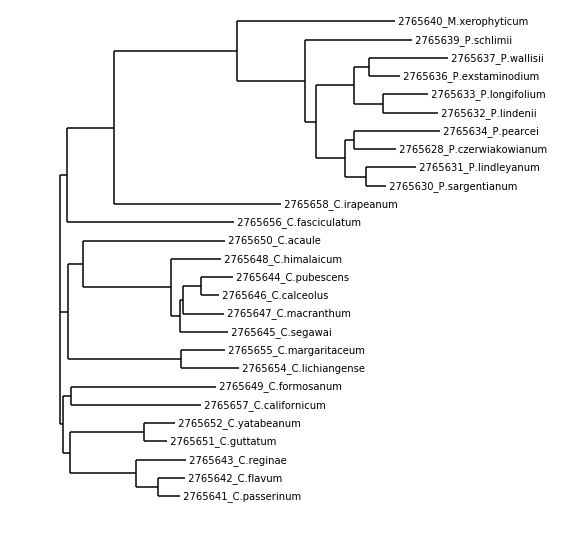

In [218]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')

Phylo.draw(arbol_clustal, axes = ax)


# si quiere guardar el cárbol tiene  que habilitar el siguiente comando
fig.savefig('../salidas/arbol_ls_orchid_editado.png', dpi = 900, bbox_inches= 'tight')

### Los árboles filogenéticos pueden ser editados y visualizardos con la siguiente herramienta

### __iTol__

[<img align="left" src="https://raw.githubusercontent.com/eduardo1011/curso_08_2021/main/iTol.png" width="500" height="500">](https://itol.embl.de/)

### La siguiente herramienta realiza alineamientos MATFF y creoa árboles filogenéticos 

### NGPhylogeny.fr

[<img align="left" src="https://raw.githubusercontent.com/eduardo1011/curso_08_2021/main/NGPhylogeny.fr_web.png" width="500" height="500">](https://ngphylogeny.fr/workflows/oneclick/)



<hr style="height:5px;border-width:0;color:blue;background-color:blue">

<img align="left" src="https://raw.githubusercontent.com/eduardo1011/curso_08_2021/main/exercise_blue.png" width="90" height="80">

<font color=#0000ff> <b>Ejercicio:</b> *realiza un MSA usando el archivo __SARS-CoV_&_SARS-CoV-2.faa__ el cual contiene secuencias de la proteína Spike (una glucoproteína transmembranal), de preferencia usa el programa __Clustal Omega__.* </font><br>


<hr style="height:5px;border-width:0;color:blue;background-color:blue"> 

<img align="left" src="https://raw.githubusercontent.com/eduardo1011/curso_08_2021/main/exercise_blue.png" width="90" height="80">


### <font color = blue>Opcional</font></br>
#### <font color = blue>Alineamiento de 40 genomas completos de SARS CoV y SARS CoV-2 de humano, y SARS CoV de murciélago y civeta.</font>
####  <font color = blue>Comparar el resultado con el de la siguiente publicación.</font>

[<img align="left" src="https://raw.githubusercontent.com/eduardo1011/curso_08_2021/main/paper_covid19.png" width="700" height="700">](https://onlinelibrary.wiley.com/doi/full/10.1002/prot.25967)

<img align="left" src="https://onlinelibrary.wiley.com/cms/asset/7ccdfbd5-9fa8-4089-9484-a9e0726ad51f/prot25967-fig-0003-m.jpg" width="400" height="400">


### Manipulando alineamientos

In [ ]:
# se abre un archivo de alineamiento múltiple de secuencias
alineamiento = AlignIO.read(alin, "clustal")

In [ ]:
print(alineamiento)

In [ ]:
# número de secuencias alineadas
print("Number of rows: " + str(len(alineamiento)))

In [ ]:
# iteración del alineamiento (línea por línea), el 50 indica la cantidad de nucleótidos a mostrar
for record in alineamiento:
    print(record.id, record.seq[0:50])

In [ ]:
# imprime las 10 primeras filas sin restringir las columnas (nucleótidos)
print(alineamiento[0:10])

In [ ]:
# se obtienen los identificadores del alineamiento
for record in alineamiento:
    print(record.id)

In [ ]:
# una manera de extraer informacion de cualquier parte del alineamiento
"""
[:, :] = esta orden indica cuántas filas y cuántas columnas quiero extraer
por ejemplo [0:5, 0:5] indica que tomará de la fila 0 a la 5, y de la columna 0 a la 5,
esta acción está configurada de tal modo que las columnas hacen referencia a los nucleótidos.
"""

print(alineamiento[0:5, 0:5])

In [ ]:
print(alineamiento[3:12, 5:25])

In [ ]:
# se pueden concatenar fragmentos extraidos de los alineamientos
editado = alineamiento[:5, :2] + alineamiento[:5, 22:28]
print(editado)

In [ ]:
# visualización antes de ser ordenado (por orden alfabético de identificadores)
print(alineamiento)

In [ ]:
alineamiento.sort()

In [ ]:
# después de ser ordenado
print(alineamiento)

<b style="font-size:2vw"><font color = red>Alineamiento múltiple de secuencias (Multiple Sequence Alignment: MSA)</font></b>

<hr style="height:2px;border-width:0;color:blue;background-color:limegreen">

### <font color = black>En bioinformática, un alineamiento de secuencias es una forma de ordenar las secuencias de ADN, ARN o proteínas para identificar regiones similares que pueden ser consecuencia de relaciones funcionales, estructurales o evolutivas.</font> 
<hr style="height:2px;border-width:0;color:blue;background-color:limegreen"> 

#### Generalmente se representan en formato gráfico y de texto.
#### Es un paso inicial para la construcción de perfiles en la búsqueda de unidades funcionales dentro de proteínas.

<b style="font-size:2vw"><font color = red>BLAST</font></b>

### Ejecución de BLAST a través de internet

> #### Programas:
`blastn`    
`blastp`  
`blastx`  
`tblast`  
`tblastx`
> #### Las bases de datos disponibles son:  
`nr/nt`  
`refseq_select`  
`refseq_rna`  
`refseq_representative_genomes`  
`refseq_genomes`  
`wgs`  
`est`  
`SRA`  
`TSA`  
`HTGS`  
`pat`  
`pdb`  
`RefSeq_Gene`  
`dbsts`

In [2]:
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML
from Bio import SearchIO

#### Ejecutando Blast usando un objeto `Seq`

In [3]:
"""
Es importante seleccionar el tipo de programa usado y la base de datos.
"""
programa1 = 'blastn'
db1 = 'nr'

In [4]:
# solo permite hacer el análisis con una secuencia
init = edu.time_ini()
resultado_1 = NCBIWWW.qblast(programa1, db1, mi_sec)
edu.time_fin(i = init)

NameError: name 'edu' is not defined

In [ ]:
# se guarda el resultado en un archivo XML
with open("../salidas/resultado_1_"+programa1+".xml", "w") as temp:
    temp.write(resultado_1.read())

In [ ]:
resultado_blast1 = SearchIO.read("../salidas/resultado_1_"+programa1+".xml", "blast-xml")

In [ ]:
print(resultado_blast1)

#### Ejecución de Blast usando un archivo fasta

In [ ]:
programa2 = 'blastp'
db2 = 'nr'

In [ ]:
fasta_string = open("../DB/p53_humano.faa").read()

In [ ]:
# solo permite hacer el análisis con una secuencia
init = edu.time_ini()
resultado_2 = NCBIWWW.qblast(programa2, db2, fasta_string)
edu.time_fin(i = init)

In [ ]:
# se guarda el resultado en un archivo XML
with open("../salidas/resultado_2_"+programa2+".xml", "w") as temp:
    temp.write(resultado_2.read())

In [ ]:
resultado_blast2 = SearchIO.read("../salidas/resultado_2_"+programa2+".xml", "blast-xml")

In [ ]:
print(resultado_blast2)

#### analizando los resultados del Blast

In [ ]:
for hit in resultado_blast1:
    print(hit)

In [ ]:
len(resultado_blast1)

In [ ]:
resultado_blast1[10]

In [ ]:
resultado_blast1[0]

In [ ]:
print(resultado_blast1[:3])

In [ ]:
# diccionarios
resultado_blast1["gi|2074180584|gb|MZ668382.1|"]

In [ ]:
for hit in resultado_blast1[:5]:   # id and sequence length of the first five hits
    print("%s %i" % (hit.id, hit.seq_len))

In [ ]:
sort_key = lambda hit: hit.seq_len
sorted_qresult = resultado_blast1.sort(key=sort_key, reverse=True, in_place=False)
for hit in sorted_qresult[:5]:
    print("%s %i" % (hit.id, hit.seq_len))

In [ ]:
def map_func(hit):
    hit.id = hit.id.split("|")[3]   # renames "gi|301171322|ref|NR_035857.1|" to "NR_035857.1"
    return hit

mapped_qresult = resultado_blast1.hit_map(map_func)
for hit in mapped_qresult[:5]:
    print(hit.id)

In [ ]:
blast_hit = resultado_blast1[3]    # fourth hit from the query result
print(blast_hit)

In [ ]:
blat_hit = resultado_blast1[0]      # the only hit
print(blat_hit)

#### Ejecución de Blast: método 2
Usando un archivo fasta

In [ ]:
uniprotkb, uniprotkb_swissprot, uniprotkb_swissprotsv, uniprotkb_trembl, uniprotkb_refprotswissprot, uniprotkb_archaea, uniprotkb_arthropoda

In [ ]:
# ncbiblast acepta solo una secuencia fasta
comando8 = 'start cmd /k cd ../salidas/ ^&^& python ../binarios/ncbiblast.py --email '+email+' --program blastp --stype protein --sequence ../DB/p53_humano.faa --database xxxxxxxxxxx'
cl = os.system(comando8)

In [ ]:
edu.Help_ncbiblast

In [ ]:
display(Image(filename='../salidas/ncbiblast-R20210802-035112-0081-21364162-p2m.ffdp-subject-png.png'))

* ### Identificación de unidades funcionales con hmmscan

In [219]:
# Hmmer3 hmmscan

# solo acepta una secuencia fasta

comando8 = 'start cmd /k cd ../salidas/ ^&^& python ../binarios/hmmer3_hmmscan.py --email '+email+' --database pfam --sequence ../DB/p53_humano.faa'
cl = os.system(comando8)

* ### Identificación de unidades funcionales con PfamScan

In [220]:
# PfamScan

# acepta hasta 100 secuencias fasta

comando10 = 'start cmd /k cd ../salidas/ ^&^& python ../binarios/pfamscan.py --email '+email+' --database pfam-a --sequence ../DB/proteinas_desconocidas.fasta'
cl = os.system(comando10)

In [221]:
import json

In [226]:
p = open('../salidas/pfamscan-R20210803-202417-0596-2890619-p2m.out.txt', 'r')

In [227]:
pp = p.read()

In [228]:
pp

'[{"model_length":"316","align":["#HMM       llidgerflllsGeihyfRlp.pelWedvlekvkalGlnaietYveWnlhepkegkydfe.GaldlekFlklaqeagLyvilRpGpYicaEwdaGGlpaWllkkkeiklRssdeafleavekyleailkkvkkllltnGGpiilvQvEneYg.....skavdkaylralakalkek.laekallftadvpseevaekg.tlp.eedilatvgfgsdaka..........keafkllkefspekPlvvsefwtgwfdewgekkaarsaeelaeevervlakn.....issvnlYMihGGTnfGflaganflgtsYdydApldEagnltpkylelke","#MATCH     l + ger+ ++sGe+hy+Rlp pelW dv++k++a G+nai++Y++W++h+ +e+++dfe Ga+d+++ ++ a++agLyvi+R GpY +aE++aGG+++W  + + ++ R+s +++ +++  ++++i k+++  ++tnGGp+il Q Ene       + ++  +y++++++a+ ++ +  + ++++++++s++++ +  ++  + +i+  ++++ +              ++++  +++s ++P  ++ef +gwf+ wg++ + +++ el  e+++v++kn     ++++n+YM+ G T++G  a a++++tsYdy Ap+ E++++++k  + k ","#PP        7789*******************************************************99******************************************************************************************9998777778889**9888887765167899999999999988876543330345999999988843345567777776677788*********************

In [229]:
p.close()

In [235]:
ww = json.loads(pp)

In [236]:
ww[1]

{'model_length': '181',
 'align': ['#HMM       aktervgngtsyttsnsaiavtelrnpdtkasFyvvrhadysslestsfklkvnTsaaGnltiPqlggsltLngrdSKilVtDYdvG.gktLlYStAEvlTwkklddktvlvlYggegetgefalkg.......kskgsssvvegskikskngalvlnwytqsegrtvvklgngllvylldrnsAynf',
  '#MATCH     ++t+++gngt+y ts+++i++++lrnp+t+a+Fyv+ h+++ss++ t+++l+vnTs aG+ltiP+    ++L gr+SKi+VtDY+ G g++LlYS+AEvlT+++l d +v+v+Y++ g++gefa+k+       k++g+s+v++     ++++ + ++ y q++g+tv+k+++g+lvylld+++A+nf',
  '#PP        689*********.6******************************************.6******9....******************77****************.9********************888888777777777773....333447888.999*************************9',
  '#SEQ       LQTQMEGNGTGY-TSDASIYTWALRNPETHAGFYVLAHSTSSSRAVTTTSLNVNTS-AGALTIPN----IELAGRQSKIIVTDYQTGdGSSLLYSSAEVLTYATL-DVDVIVFYLNIGQKGEFAFKDapthltfKTYGNSKVSSA----KSDHGTKYT-YCQGDGTTVLKFSHGVLVYLLDKETAWNF'],
 'env': {'to': '557', 'from': '381'},
 'name': 'BetaGal_dom2',
 'acc': 'PF10435.9',
 'sig': 1,
 'evalue': '1.1e-54',
 'desc': 'Beta-galactosidase,

In [231]:
ww[1].keys()

dict_keys(['model_length', 'align', 'env', 'name', 'acc', 'sig', 'evalue', 'desc', 'hmm', 'act_site', 'type', 'bits', 'clan', 'seq'])

In [ ]:
DatA = []
for w in ww:
    data = []
    for i in w:
        if i == 'align':
            pass
        else:
            data.append(w[i])
    DatA.append(data)

In [ ]:
i

In [ ]:
for w in ww:
    print(w)

In [ ]:
w

In [ ]:



data = []
for i in ww[1]:
    print(ww[1][i])
    data.append(ww[1][i])

In [ ]:
from pandas import DataFrame

In [ ]:
DataFrame(DatA)

In [ ]:
ww[1].keys()

In [ ]:
Chapter ‍9 Accessing NCBI’s Entrez databases